# DeepDriveMD with ADRP

## Configuration

- Node count: 10 nodes on Summit, 60 GPUs
- Iteration count: 10
- contact matrix size: [166,166,1] for adrp
- Simulation length: 5ns for the first and then 1ns
- Retraining interval: every 5th iteration i.e. iter1 and iter6 out of 10 iterations
- Walltime: 9+ hours


In [2]:
import pandas as pd

## Raw data (collected manually)

In [35]:
res={'md': [1913, 423, 427, 425, 427, 429, 424, 424, 420, 427],
     'hdf5': [15, 0, 0, 0, 0, 73, 0, 0, 0, 0], 
     'cvae': [1177, 0, 0, 0, 0, 2321, 0, 0, 0, 0], 
     'infer': [4693, 1274, 1153, 1344, 1423, 4623, 2003, 2328, 2345, 2258]}
res

{'md': [1913, 423, 427, 425, 427, 429, 424, 424, 420, 427],
 'hdf5': [15, 0, 0, 0, 0, 73, 0, 0, 0, 0],
 'cvae': [1177, 0, 0, 0, 0, 2321, 0, 0, 0, 0],
 'infer': [4693, 1274, 1153, 1344, 1423, 4623, 2003, 2328, 2345, 2258]}

## Accumulated stage durations

Text(0.5, 0, 'ADRP/9hrs/60GPUs')

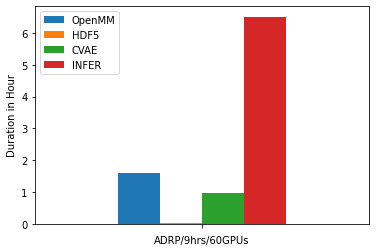

In [34]:
df = pd.DataFrame({"OpenMM": sum(res['md'])/3600,
                  "HDF5":sum(res['hdf5'])/3600,
                  "CVAE":sum(res['cvae'])/3600,
                  "INFER":sum(res['infer'])/3600},index=[''])
ax=df.plot.bar(rot=0)
ax.set_ylabel('Duration in Hour')
ax.set_xlabel('ADRP/9hrs/60GPUs')

## Stage duration on each iteration

In [6]:
index = [ "iter-%s" % x for x in range(1,11) ]

Text(0, 0.5, 'Duration in Minute')

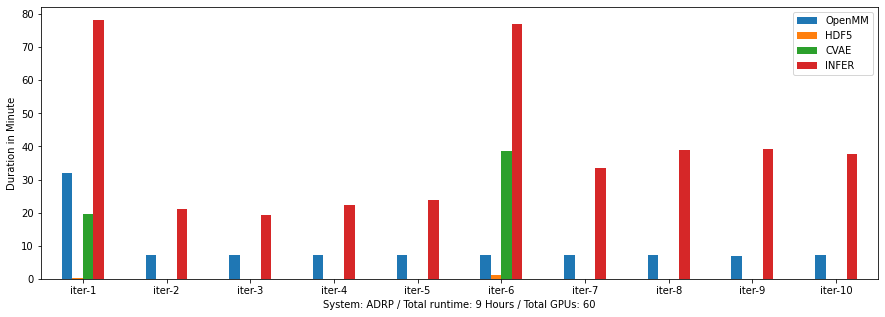

In [29]:
df = pd.DataFrame({"OpenMM": [ x / 60 for x in res['md']],
                  "HDF5":[ x / 60 for x in res['hdf5']],
                  "CVAE":[ x / 60 for x in res['cvae']],
                  "INFER":[ x / 60 for x in res['infer']]}, index=index)
ax=df.plot.bar(rot=0,figsize=(15,5))
ax.set_xlabel("System: ADRP / Total runtime: 9 Hours / Total GPUs: 60")
ax.set_ylabel('Duration in Minute')

## TTX in seconds

In [22]:
ttx=0
for x in res:
    ttx += sum(res[x])
ttx

32769